# Activity 1.2 : Training Neural Networks


#### Objective(s):

This activity aims to demonstrate how to train neural networks using keras

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks 
* Demonstrate how to evaluate and plot the model using training and validation loss


#### Resources:
* Jupyter Notebook

CI Pima Diabetes Dataset

* pima-indians-diabetes.csv


#### Procedures

Load the necessary libraries 

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

%matplotlib inline

In [21]:
## Import Keras objects for Deep Learning
import keras
from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop

Load the dataset

In [22]:

filepath = "pima-indians-diabetes.csv"
names = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin", 
         "bmi", "pedigree_function", "age", "has_diabetes"]
diabetes_df = pd.read_csv(filepath, names=names)

Check the top 5 samples of the data

In [23]:

print(diabetes_df.shape)
diabetes_df.sample(5)

(768, 9)


,times_pregnant,glucose_tolerance_test,blood_pressure,skin_thickness,insulin,bmi,pedigree_function,age,has_diabetes
98,6,93,50,30,64,28.7,0.356,23,0
482,4,85,58,22,49,27.8,0.306,28,0
539,3,129,92,49,155,36.4,0.968,32,1
338,9,152,78,34,171,34.2,0.893,33,1
106,1,96,122,0,0,22.4,0.207,27,0


In [24]:
diabetes_df.dtypes

times_pregnant              int64
glucose_tolerance_test      int64
blood_pressure              int64
skin_thickness              int64
insulin                     int64
bmi                       float64
pedigree_function         float64
age                         int64
has_diabetes                int64
dtype: object

In [25]:
X = diabetes_df.iloc[:, :-1].values
y = diabetes_df["has_diabetes"].values

Split the data to Train, and Test (75%, 25%)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)

In [27]:
np.mean(y), np.mean(1-y)

(np.float64(0.3489583333333333), np.float64(0.6510416666666666))

Build a single hidden layer neural network using 12 nodes. 
Use the sequential model with single layer network and input shape to 8. 



Normalize the data

In [28]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

Define the model:
* Input size is 8-dimensional
* 1 hidden layer, 12 hidden nodes, sigmoid activation 
* Final layer with one node and sigmoid activation (standard for binary classification)

In [29]:


model  = Sequential([
    Dense(12, input_shape=(8,), activation="relu"),
    Dense(1, activation="sigmoid")
])

e:\anaconda2\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


View the model summary 

In [30]:

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 12)             │           108 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121 (484.00 B)

 Trainable params: 121 (484.00 B)

 Non-trainable params: 0 (0.00 B)

Train the model 
* Compile the model with optimizer, loss function and metrics
* Use the fit function to return the run history. 


In [31]:

model.compile(SGD(learning_rate = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=200)


Epoch 1/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4809 - loss: 0.7782 - val_accuracy: 0.5156 - val_loss: 0.7230
Epoch 2/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5104 - loss: 0.7613 - val_accuracy: 0.5417 - val_loss: 0.7089
Epoch 3/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5330 - loss: 0.7458 - val_accuracy: 0.5469 - val_loss: 0.6961
Epoch 4/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5382 - loss: 0.7318 - val_accuracy: 0.5729 - val_loss: 0.6845
Epoch 5/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5503 - loss: 0.7191 - val_accuracy: 0.5885 - val_loss: 0.6740
Epoch 6/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5625 - loss: 0.7075 - val_accuracy: 0.6042 - val_loss: 0.6644
Epoch 7/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5781 - loss: 0.6968 - val_accuracy: 0.6042 - val_loss: 0.6557
Epoch 8/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5955 - loss: 0.6871 - val_accuracy: 0.6146 - v

In [32]:
## Like we did for the Random Forest, we generate two kinds of predictions
#  One is a hard decision, the other is a probabilitistic score.

y_pred_class_nn_1 = model.predict(X_test_norm)
y_pred_prob_nn_1 = model.predict(X_test_norm)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [33]:
# Let's check out the outputs to get a feel for how keras apis work.
y_pred_class_nn_1[:10]

array([[0.40164214],
       [0.54537904],
       [0.24682595],
       [0.28921756],
       [0.17198394],
       [0.5325817 ],
       [0.04019923],
       [0.315926  ],
       [0.61475563],
       [0.1812049 ]], dtype=float32)

In [34]:
y_pred_prob_nn_1[:10]

array([[0.40164214],
       [0.54537904],
       [0.24682595],
       [0.28921756],
       [0.17198394],
       [0.5325817 ],
       [0.04019923],
       [0.315926  ],
       [0.61475563],
       [0.1812049 ]], dtype=float32)

Create the plot_roc function

AUC Score for Neural Network: 0.8242


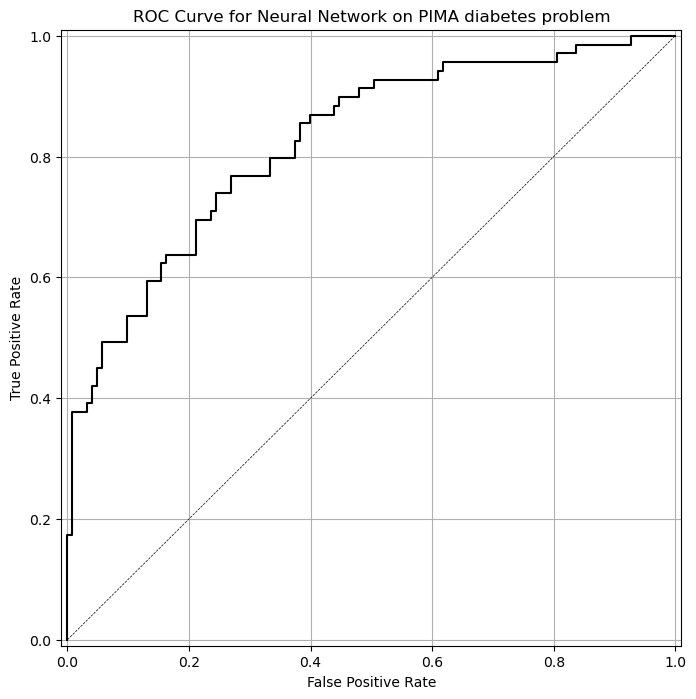

In [55]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    auc_score = roc_auc_score(y_test, y_pred)
    print('AUC Score for {}: {:.4f}'.format(model_name, auc_score
    ))
    return fig, ax
plot_roc(y_test, y_pred_prob_nn_1, "Neural Network")
plt.show()

Evaluate the model performance and plot the ROC CURVE

In [44]:
print(f"y_test shape: {y_test.shape}, type: {type(y_test)}")
print(f"y_pred shape: {y_pred_class_nn_1.shape}, type: {type(y_pred_class_nn_1)}")

# Check the first few values to see if they are floats or ints
print(f"y_test sample: {y_test[:5]}")
print(f"y_pred sample: {y_pred_class_nn_1[:5]}")

y_test shape: (192,), type: <class 'numpy.ndarray'>
y_pred shape: (192,), type: <class 'numpy.ndarray'>
y_test sample: [0 1 1 0 0]
y_pred sample: [0 1 0 0 0]


In [46]:
#  Convert probabilities to class labels (0 or 1)
# .flatten() fixes the (192, 1) to (192,) shape issue
y_pred_class_nn_1 = (y_pred_prob_nn_1.flatten() > 0.5).astype(int)


accuracy is 0.766
roc-auc is 0.824
AUC Score for NN: 0.8242


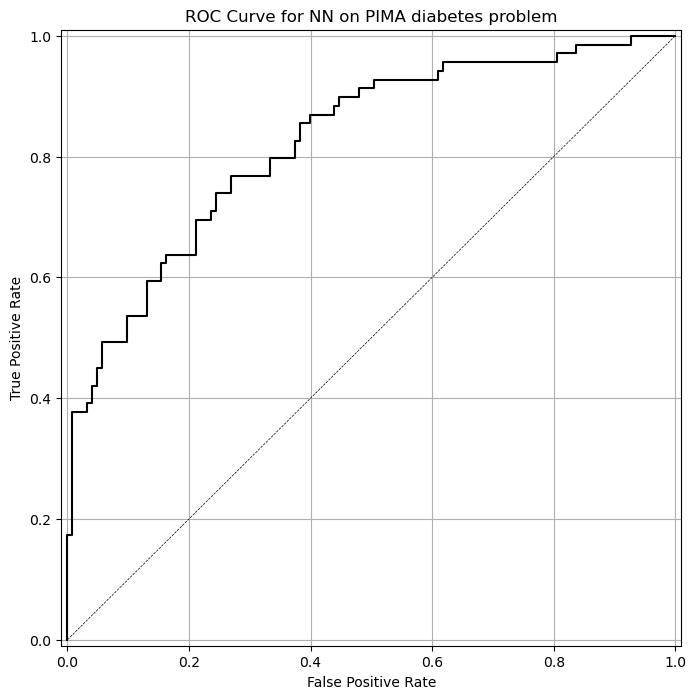

In [50]:
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

plot_roc(y_test, y_pred_prob_nn_1, 'NN')
plt.show()

 Plot the training loss and the validation loss over the different epochs and see how it looks

In [51]:
run_hist_1.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

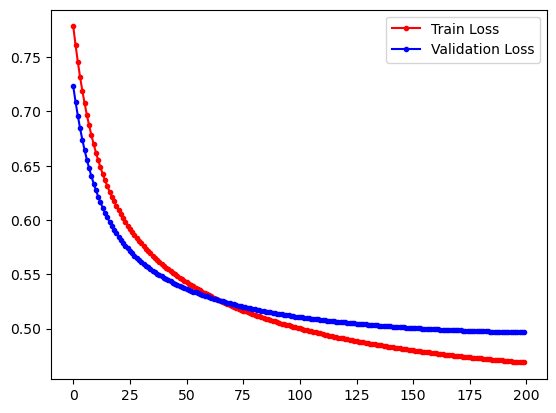

In [54]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()
plt.show()


What is your interpretation about the result of the train and validation loss?

The training and validation loss both decrease and stabilize, which shows the model is successfully learning the patterns in the data without significant overfitting.

#### Supplementary Activity

* Build a model with two hidden layers, each with 6 nodes
* Use the "relu" activation function for the hidden layers, and "sigmoid" for the final layer
* Use a learning rate of .003 and train for 1500 epochs
* Graph the trajectory of the loss functions, accuracy on both train and test set
* Plot the roc curve for the predictions
* Use different learning rates, numbers of epochs, and network structures. 
* Plot the results of training and validation loss using different learning rates, number of epocgs and network structures
* Interpret your result

In [56]:
# Build a model with two hidden layers (6 nodes each)
model_1 = Sequential([
    Dense(6, input_shape=(8,), activation="relu"), # Hidden Layer 1
    Dense(6, activation="relu"),                   # Hidden Layer 2
    Dense(1, activation="sigmoid")                  # Final Layer
])

# Use a learning rate of .003 and train for 1500 epochs
model_1.compile(optimizer=SGD(learning_rate=0.003), loss="binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model_1.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=1500, verbose=0)

e:\anaconda2\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


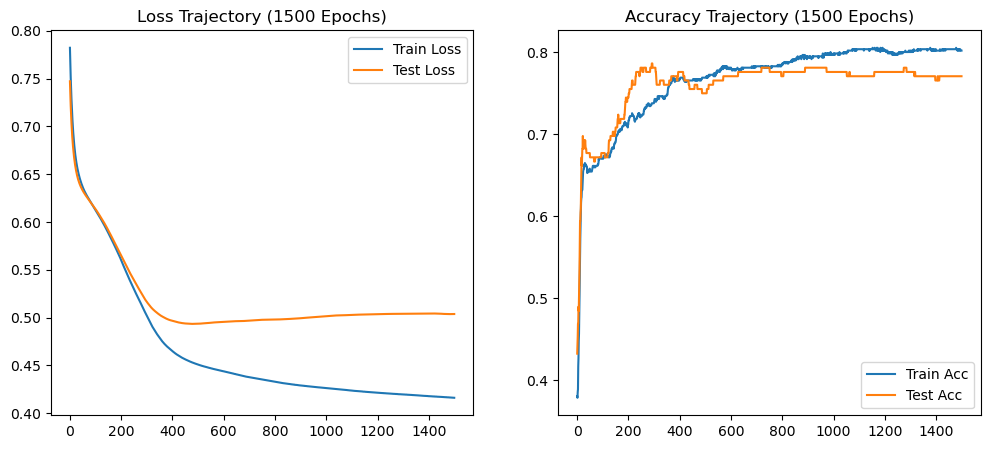

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
AUC Score for NN (6-6 Structure): 0.8260


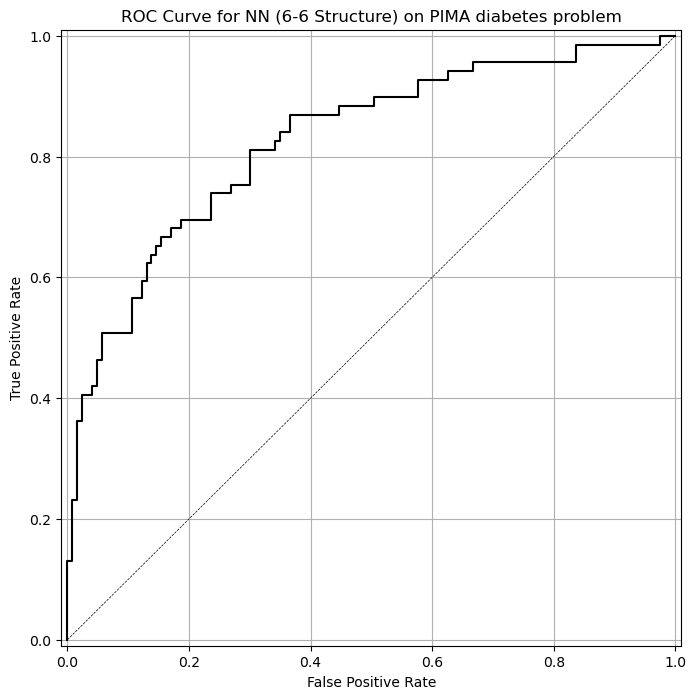

In [62]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Loss Plot
ax[0].plot(run_hist_1.history['loss'], label='Train Loss')
ax[0].plot(run_hist_1.history['val_loss'], label='Test Loss')
ax[0].set_title('Loss Trajectory (1500 Epochs)')
ax[0].legend()

# Accuracy Plot
ax[1].plot(run_hist_1.history['accuracy'], label='Train Acc')
ax[1].plot(run_hist_1.history['val_accuracy'], label='Test Acc')
ax[1].set_title('Accuracy Trajectory (1500 Epochs)')
ax[1].legend()
plt.show()

y_pred_prob_nn_1 = model_1.predict(X_test_norm)
plot_roc(y_test, y_pred_prob_nn_1, 'NN (6-6 Structure)')
plt.show()

As training continues to 1500 epochs, the training loss keeps dropping while the test loss starts to flatten and slightly rise, suggesting the beginning of minor overfitting. The accuracy graph shows the model reaches a stable peak around 80% on training data, but the test accuracy remains slightly lower and more volatile.

The curve stays well above the diagonal dashed line, resulting in a strong AUC score of 0.8260. This indicates that the neural network has a high probability of correctly distinguishing between patients with and without diabetes.

e:\anaconda2\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


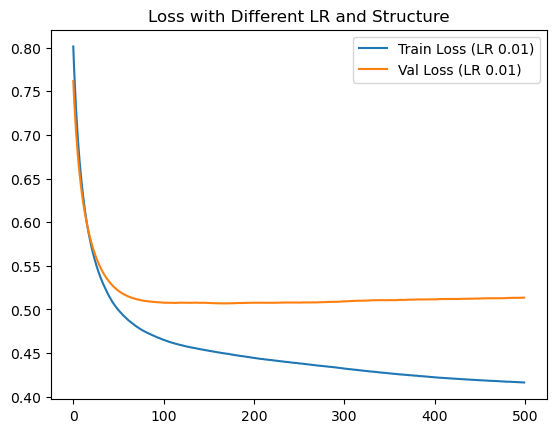

In [63]:
# Different structure (10 nodes), higher learning rate (0.01), fewer epochs (500)
model_2 = Sequential([
    Dense(10, input_shape=(8,), activation="relu"),
    Dense(1, activation="sigmoid")
])

model_2.compile(optimizer=SGD(learning_rate=0.01), loss="binary_crossentropy", metrics=["accuracy"])
run_hist_2 = model_2.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=500, verbose=0)

# Plotting results of the second experiment
plt.plot(run_hist_2.history['loss'], label='Train Loss (LR 0.01)')
plt.plot(run_hist_2.history['val_loss'], label='Val Loss (LR 0.01)')
plt.title('Loss with Different LR and Structure')
plt.legend()
plt.show()

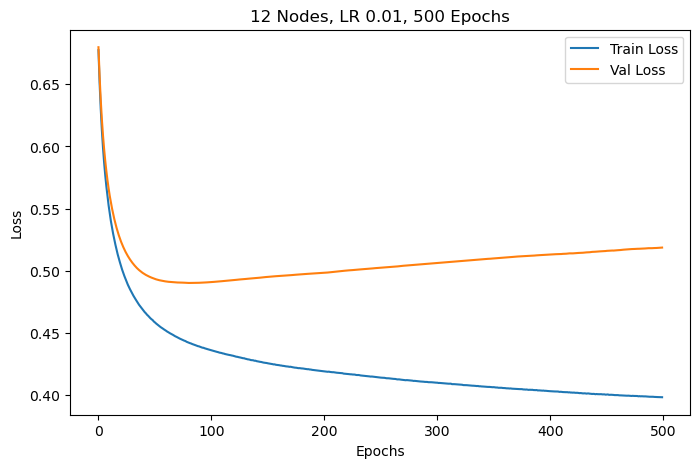

In [69]:
#(12 nodes), LR = 0.01, 500 Epochs.
model_2 = Sequential([
    Dense(12, input_shape=(8,), activation="relu"),
    Dense(1, activation="sigmoid")
])
model_2.compile(optimizer=SGD(learning_rate=0.01), loss="binary_crossentropy", metrics=["accuracy"])
run_hist_2 = model_2.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=500, verbose=0)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(run_hist_2.history['loss'], label='Train Loss')
plt.plot(run_hist_2.history['val_loss'], label='Val Loss')
plt.title('12 Nodes, LR 0.01, 500 Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

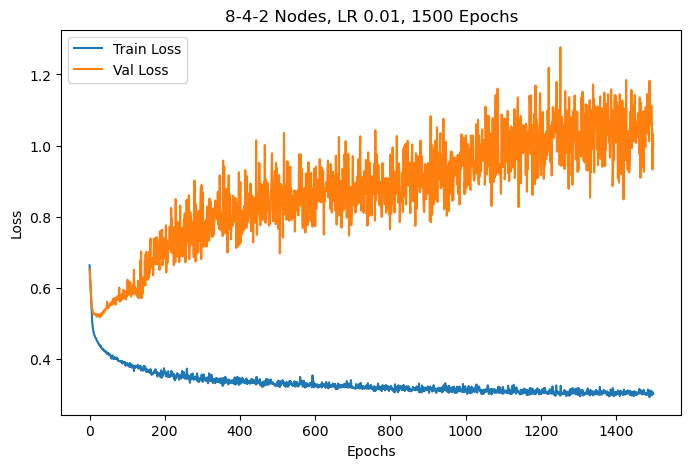

In [73]:
# (8, 4, 2 nodes), LR = 0.1, 1500Epochs.
model_3 = Sequential([
    Dense(8, input_shape=(8,), activation="relu"),
    Dense(4, activation="relu"),
    Dense(2, activation="relu"),
    Dense(1, activation="sigmoid")
])
model_3.compile(optimizer=SGD(learning_rate=0.1), loss="binary_crossentropy", metrics=["accuracy"])
run_hist_3 = model_3.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=1500, verbose=0)

# Plotting 
plt.figure(figsize=(8, 5))
plt.plot(run_hist_3.history['loss'], label='Train Loss')
plt.plot(run_hist_3.history['val_loss'], label='Val Loss')
plt.title('8-4-2 Nodes, LR 0.01, 1500 Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

The initial 500 epoch training shows a healthy convergence where both training and validation loss decrease steadily together means the model is learning general patterns. But extending training to 1500 epochs or increasing the learning rate to 0.01 causes the validation loss to flatten or rise while training loss continues to drop, which is a sign of overfitting

#### Conclusion

In this activity, I successfully built and trained a neural network using Keras to predict diabetes risk, evaluating its performance through loss and accuracy trajectories. The plots revealed that while the model learns effectively, training for too many epochs or using a high learning rate can lead to overfitting, where the validation loss begins to rise. the ROC curve and AUC score of 0.8260 demonstrate that the model is a strong classifier capable of distinguishing between classes on unseen data.